## Forecasting

Forecasting is a statistical process used to predict future values based on previously observed values.

### Types of Forecasting

1. **Qualitative Forecasting**: 
    - Decisions are dependent upon expert opinions.
    - There is no data available to study patterns in order to make forecasting decisions.
    - Human decision-making is involved, which introduces a chance of bias.

2. **Quantitative Forecasting**: 
    - Decisions are based on statistical and mathematical models.
    - Relies on historical data to identify patterns and make predictions.
    - Minimizes human bias by using objective data.

### Time Series Forecast

Time series forecasting is the process of analyzing time series data using statistical methods and modeling to make predictions and informed strategic decisions, It falls under Quantitative Forecasting. The data used in this process is referred to as Time Series Data.

### Rules for Accurate Forecasting

To make accurate forecasts, follow these key rules:

1. **Granularity Rule**
    - **Explanation**: The more you aggregate your data, the more accurate your forecasts will be.
    - **Reason**: Aggregated data has less variation and noise.

2. **Frequency Rule**
    - **Explanation**: Update your data frequently to include new information.
    - **Reason**: This keeps your forecasts accurate and up-to-date.

3. **Horizon Rule**
    - **Explanation**: Avoid making long-term predictions.
    - **Reason**: Short-term predictions are more accurate than long-term ones.



### Let's Dive Deep

In [29]:
## Imports 
import warnings 
warnings.filterwarnings('ignore')

import zipfile
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose



sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


### Constants 
DATA_FOLDER = "../data/"
ZIP_PATH = f'{DATA_FOLDER}/archive.zip'
csv_files = []
FIG_PATH = "../figures/"
ORG_DATA = pd.DataFrame()
COMMON_COMPANIES = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


In [2]:
def save_figs(figname):
    plt.savefig(os.path.join(FIG_PATH, figname), format="png", dpi=300)

In [3]:
# ## Loading Data (Caution Run this Cell only Once)
# with zipfile.ZipFile(file=ZIP_PATH, mode="r") as zip_file:
#     zip_file.extractall(path="../data/")

# print("Files unzipped successfully!")


Files unzipped successfully!


In [4]:
csv_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith('.csv')]

In [6]:
dfs = []

for file in csv_files:
    col_name = file.split(".")[0].strip()
    df = pd.read_csv(f'{DATA_FOLDER}{file}')
    # df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)

    # df["Date"] = df["Date"].apply(lambda x: str(x).split(" ")[0])
    # df['Date'] = pd.to_datetime(df['Date']).dt.date
    # df.set_index('Date', inplace=True)
    # df['Adj Close'] = (df['Close'] - df['Dividends']) * df['Stock Splits']
    df = df.drop(columns=["Dividends", "Stock Splits"], axis=1)
    df["Company"] = col_name
    dfs.append(df)  

ORG_DATA = pd.concat(dfs, ignore_index=True)

data = ORG_DATA
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', utc=True)
data.set_index("Date", inplace=True)

   

#### Data Analysis

In [7]:
data.sample(10)

,Open,High,Low,Close,Volume,Company
Date,,,,,,
2021-03-15 04:00:00+00:00,98.025639,99.550103,97.746006,99.459900,6642200,ABBV
2000-08-29 04:00:00+00:00,9.040380,9.214473,8.965769,9.152297,713600,EXPD
2011-02-17 05:00:00+00:00,33.197687,33.361761,33.042730,33.279724,455400,XRAY
2018-06-04 04:00:00+00:00,96.748101,97.392785,96.130656,96.593735,526000,AVY
1976-09-13 04:00:00+00:00,0.000000,2.070814,2.009456,2.009456,18600,SNA
2002-04-11 04:00:00+00:00,23.101773,23.109581,22.328852,22.367887,220100,RL
1964-09-14 04:00:00+00:00,0.976298,0.979664,0.959465,0.969565,218400,CAT
2009-09-14 04:00:00+00:00,17.993883,18.414383,17.935480,18.408543,2604400,PEG
1992-12-17 05:00:00+00:00,1.228089,1.250831,1.228089,1.250831,1563600,PGR


In [8]:
# Shape
print(f'Dataset (row,col): {data.shape}')

# Missing values
print(f'Missing values in Dataset:\n{data.isnull().sum()}')

# Duplicates
print(f'Duplicates in Dataset: {data.duplicated().sum()}')

Dataset (row,col): (4208047, 6)
Missing values in Dataset:
Open       0
High       0
Low        0
Close      0
Volume     0
Company    0
dtype: int64
Duplicates in Dataset: 17154


In [10]:
## Remove 17154 duplicates
data = data.drop_duplicates()

In [11]:
# check column types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4190893 entries, 2014-09-22 04:00:00+00:00 to 2023-09-21 04:00:00+00:00
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Open     float64
 1   High     float64
 2   Low      float64
 3   Close    float64
 4   Volume   int64  
 5   Company  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 223.8+ MB


In [13]:
## Popular Companies
pop_comps =  data[data['Company'].isin(COMMON_COMPANIES)]
pop_comps.sample(10)

,Open,High,Low,Close,Volume,Company
Date,,,,,,
1991-04-11 04:00:00+00:00,0.486706,0.512747,0.484910,0.510054,355588800,AAPL
1987-05-18 04:00:00+00:00,0.257225,0.257225,0.241586,0.248597,172598400,MSFT
2010-02-10 05:00:00+00:00,5.900000,5.930500,5.800000,5.868000,124664000,AMZN
2022-03-16 04:00:00+00:00,285.073205,290.456990,279.245752,290.279510,37826300,MSFT
2000-01-14 05:00:00+00:00,33.293624,35.390249,32.847121,34.866093,73416400,MSFT
2013-11-12 05:00:00+00:00,16.229819,16.425768,16.208814,16.303183,204276800,AAPL
2003-03-21 05:00:00+00:00,16.671123,16.702283,16.222405,16.558943,85586800,MSFT
1999-08-30 04:00:00+00:00,28.848007,29.022726,28.440330,28.653875,33300800,MSFT
2002-12-31 05:00:00+00:00,0.212199,0.217656,0.211441,0.217201,200726400,AAPL


#### Limitations of Time Series Analysis?
Time series has the below-mentioned limitations; we have to take care of those during our data analysis.

1. Similar to other models, the missing values are not supported by TSA
2. The data points must be linear in their relationship.
3. Data transformations are mandatory, so they are a little expensive.
4. Models mostly work on Uni-variate data.

### Figures 

#### Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

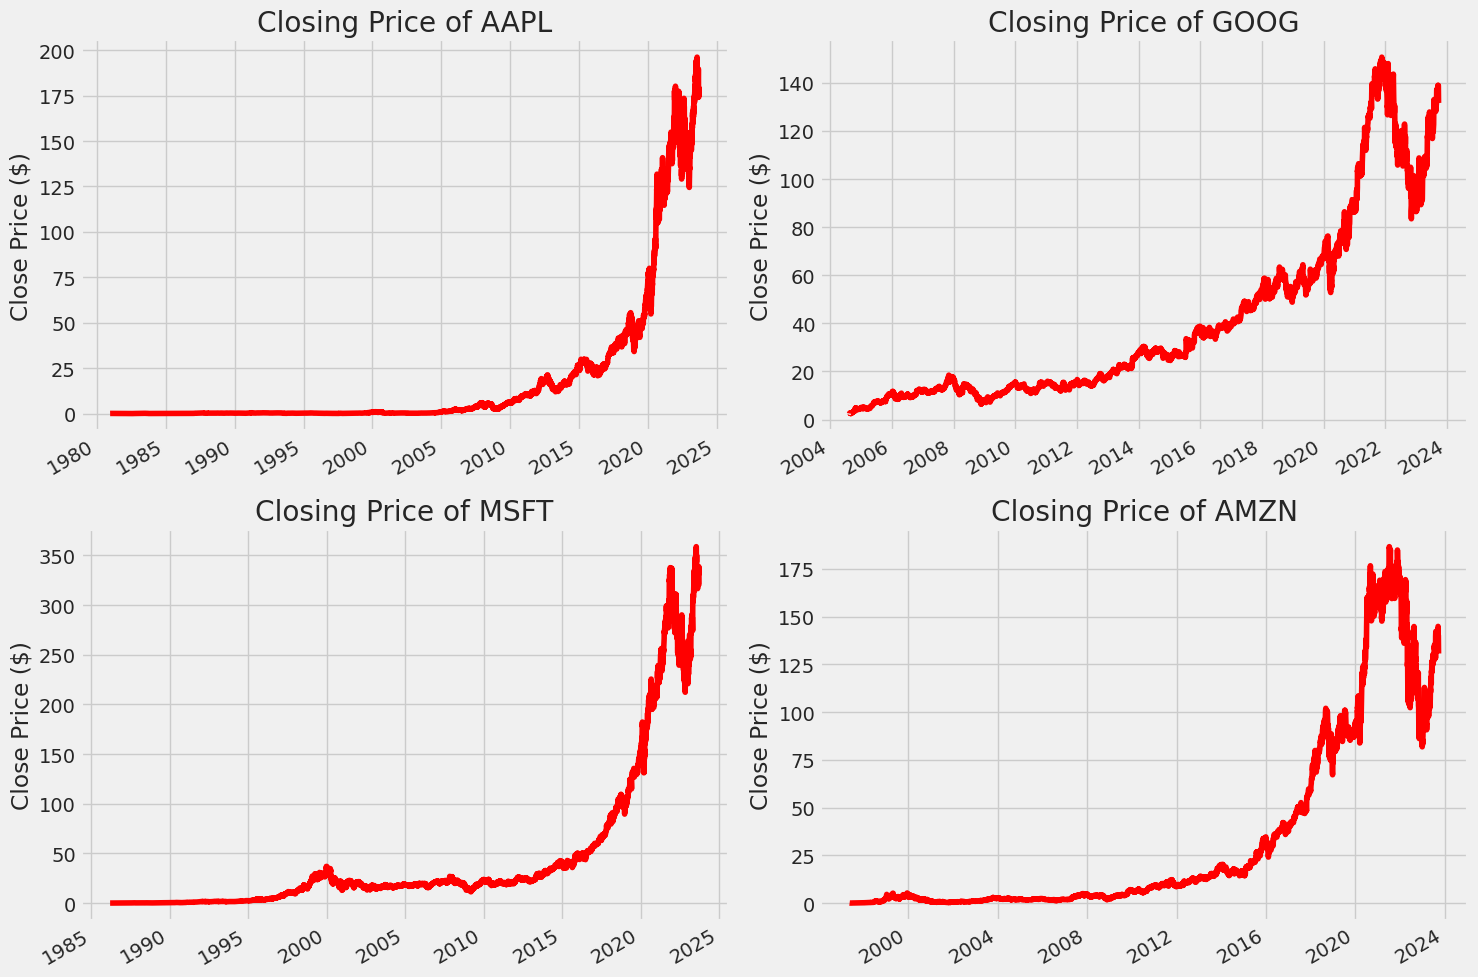

In [14]:
## Price Plot
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(COMMON_COMPANIES, 1):
    plt.subplot(2, 2, i)
    data[data['Company'] == company]['Close'].plot(color='red', )
    plt.ylabel('Close Price ($)')
    plt.xlabel(None)
    plt.title(f"Closing Price of {COMMON_COMPANIES[i - 1]}")
plt.tight_layout()
save_figs("fig_1a.png")


#### Observations:

1. **Stock Prices Over Time:** The graph presents the closing prices of four major technology companies (Apple, Google, Microsoft, and Amazon) from approximately 1980 to 2024.

2. **Exponential Growth:** All four stocks exhibit significant growth over time, particularly in the later years. This suggests a strong upward trend in their stock values.

3. **Relative Performance:** While all stocks have grown, their performance varies. Apple and Microsoft have seen more substantial growth compared to Google and Amazon, especially in the earlier years.

4. **Market Fluctuations:** The lines are not perfectly smooth, indicating fluctuations in stock prices due to market conditions, company performance, and other factors.

5. **Recent Volatility:** The most recent years show increased volatility in all stock prices, with more pronounced ups and downs.

### Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

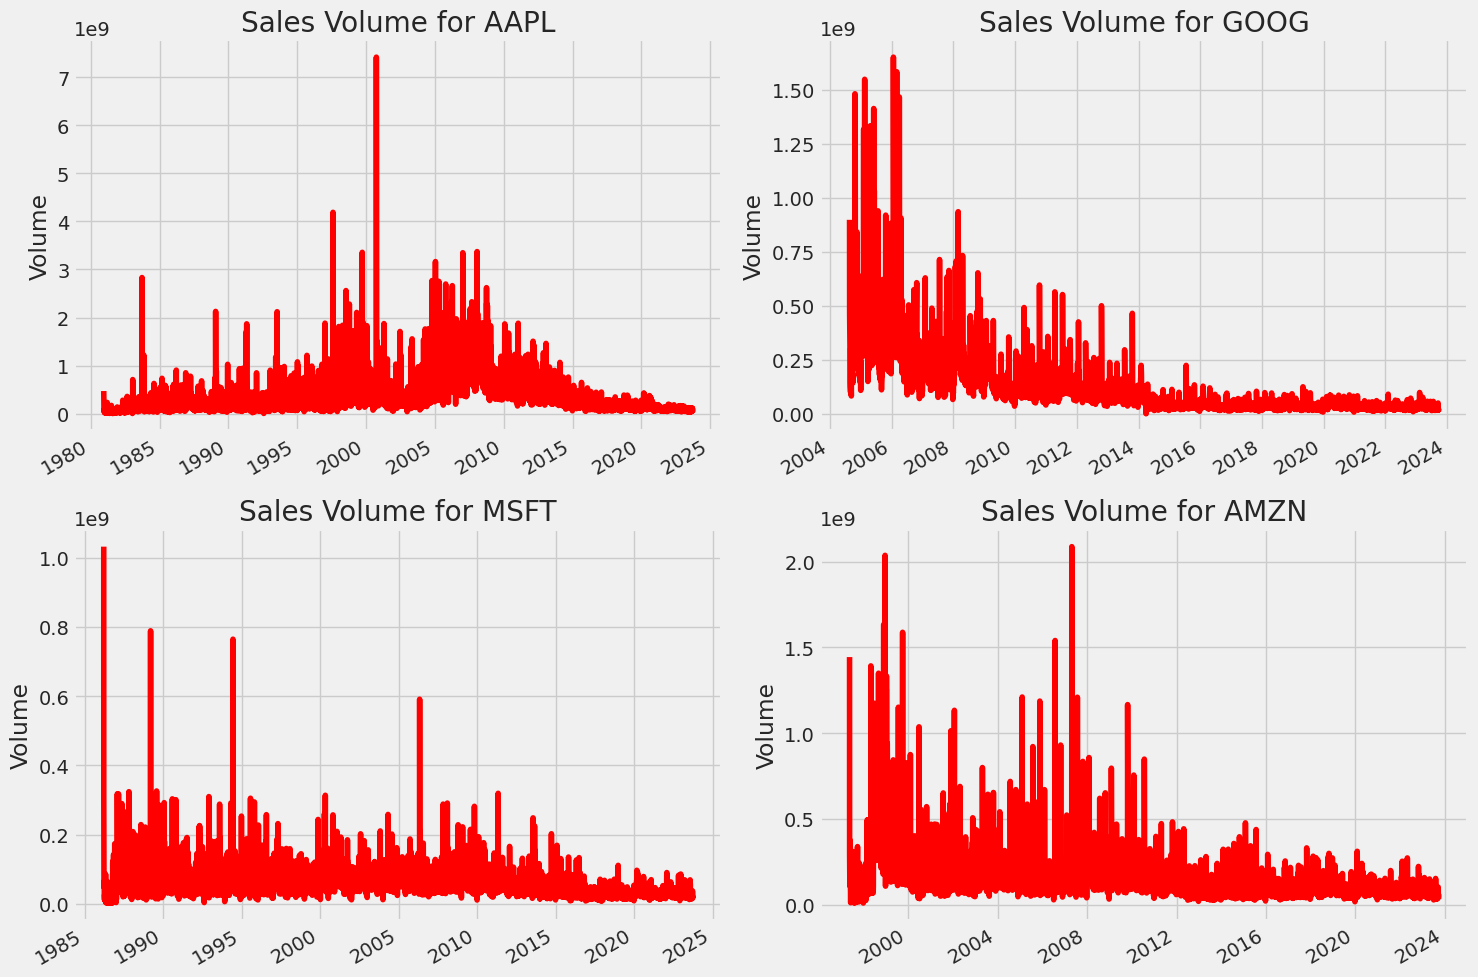

In [15]:
# Volume Plot
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(COMMON_COMPANIES, 1):
    plt.subplot(2, 2, i)
    data[data['Company'] == company]['Volume'].plot(color='red')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {COMMON_COMPANIES[i - 1]}")
plt.tight_layout()
save_figs("fig_1b.png")

#### Observations:

1. **Sales Volume Over Time:** The image presents the sales volume for four
major technology companies (Apple, Google, Microsoft, and Amazon) from
approximately 1980 to 2024.

2. **Fluctuations:** All four companies exhibit significant fluctuations in
sales volume over time. There are periods of high sales volume
interspersed with periods of lower sales volume.

3. **Relative Performance:** While all companies have experienced
fluctuations, their sales volume patterns differ. Apple and Microsoft
demonstrate higher overall sales volume compared to Google and Amazon,
particularly in the earlier years.

4. **Recent Trends:** In recent years, all companies have exhibited
increasing sales volume, with Amazon and Google showing particularly
strong growth.

5. **Seasonality:** There appears to be some seasonality in the sales volume
data, with peaks and troughs occurring at regular intervals. This
could be attributed to factors such as product launches, holiday
seasons, or economic cycles.

### What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

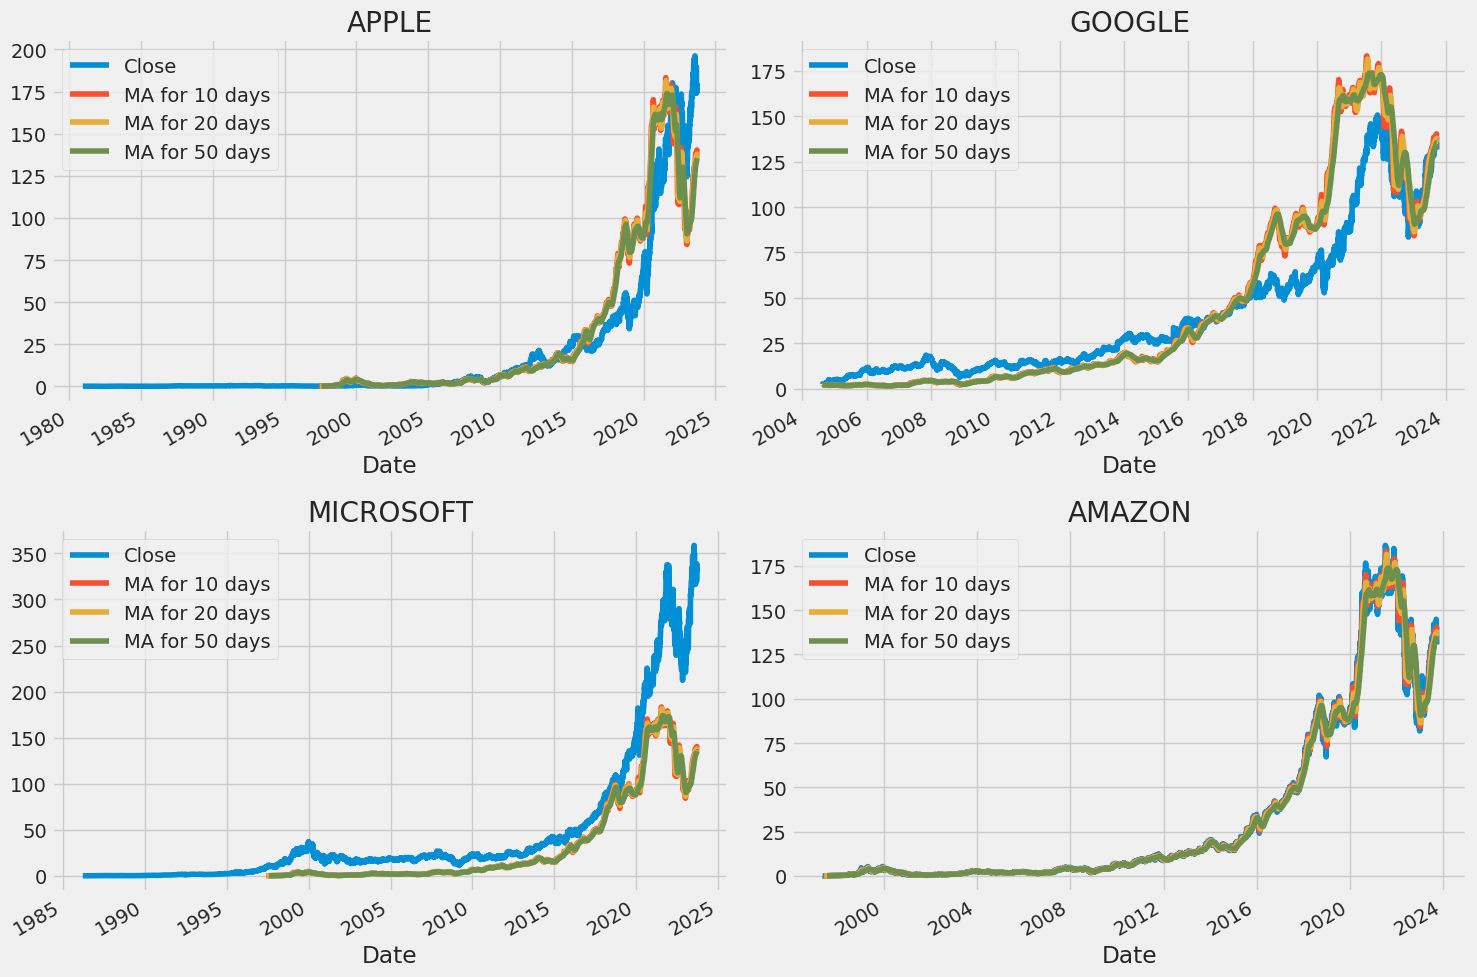

In [16]:
#Moving Averages Plot  
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in COMMON_COMPANIES:
        column_name = f"MA for {ma} days"
        data[column_name] = data[data['Company'] == company]["Close"].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
data[data['Company'] == "AAPL"][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
data[data['Company'] == "GOOG"][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')
data[data['Company'] == "MSFT"][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
data[data['Company'] == "AMZN"][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
fig.tight_layout()
save_figs("fig_1c.png")

#### Observations 

1. **Overall Trend:**
All four companies (Apple, Google, Microsoft, and Amazon) exhibit strong upward trends in their stock prices over the analyzed period.
The rate of growth has accelerated in recent years, especially for Apple, Google, and Amazon.

2. **Relative Performance:**
Apple has consistently outperformed the other three companies in terms of stock price growth.
Microsoft has shown steady growth, though it trails Apple.
Google and Amazon have experienced significant growth in recent years, catching up with Apple and Microsoft.

3. **Volatility:**
All stocks exhibit periods of high volatility, especially during market downturns.
The volatility appears to have increased in recent years.

4. **Moving Averages:**
The relationship between the 10-day, 20-day, and 50-day moving averages provides insights into short-term and long-term trends.
When the shorter-term moving averages are above the longer-term ones, it generally indicates an uptrend.
Crossovers of moving averages can signal potential trend changes.

### Daily return of the stocks on average?

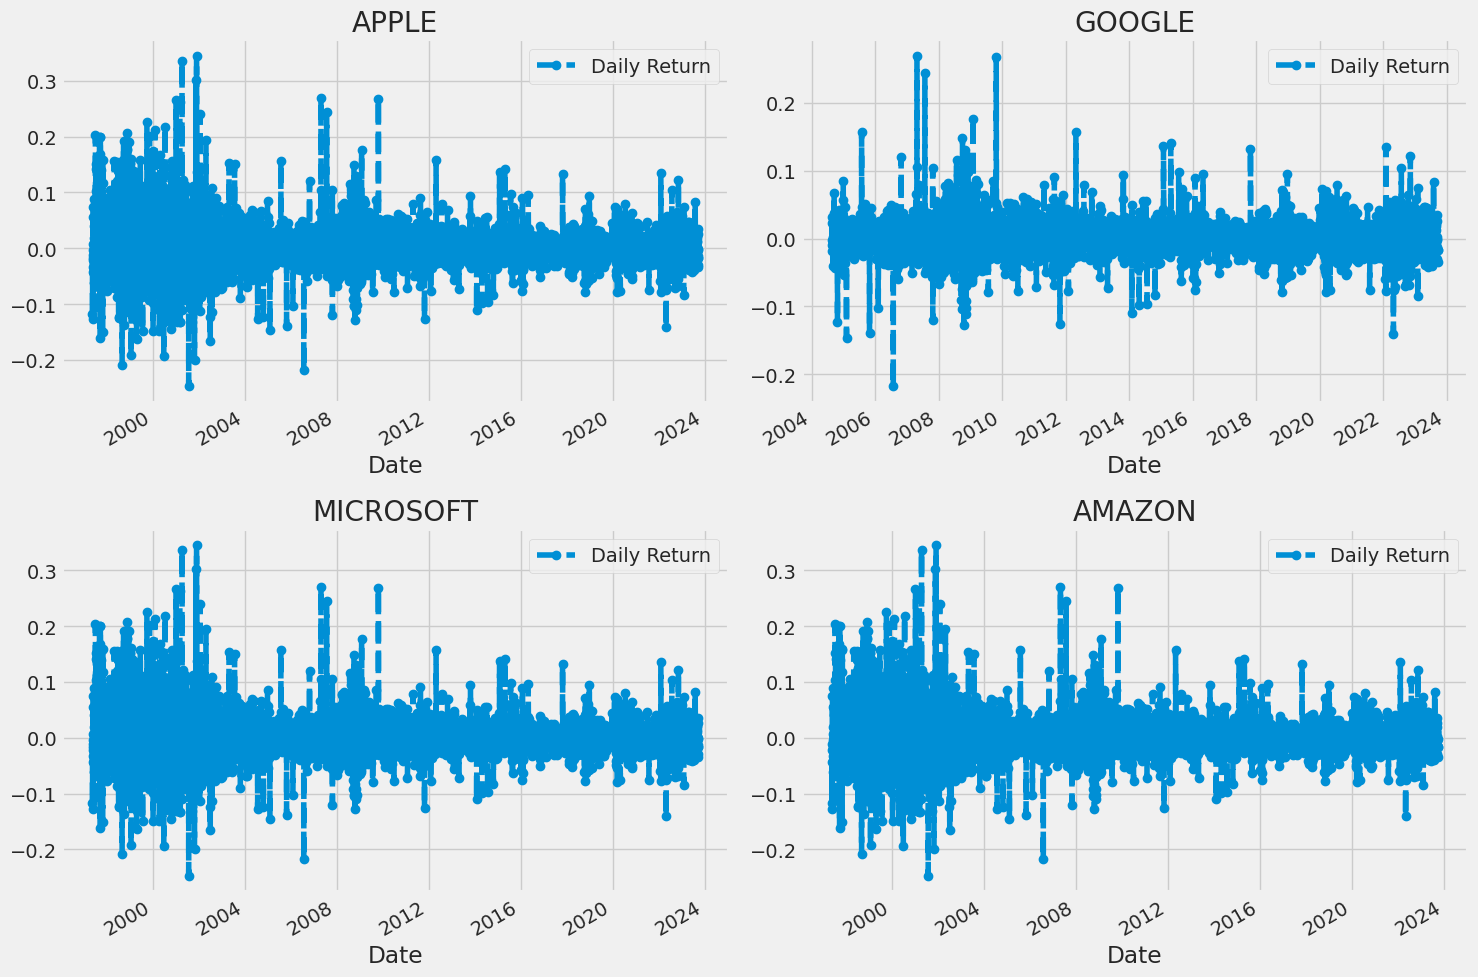

In [17]:
# We'll use pct_change to find the percent change for each day
for company in COMMON_COMPANIES:
    data['Daily Return'] = data[data['Company'] == company]['Close'].pct_change()
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
data[data['Company'] == "AAPL"]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
data[data['Company'] == "GOOG"]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
data[data['Company'] == "MSFT"]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
data[data['Company'] == "AMZN"]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()
save_figs("fig_1d.png")

#### Observations:

1. **High Volatility:** All four companies (Apple, Google, Microsoft, and Amazon) exhibit high levels of daily return volatility. This indicates significant price fluctuations on a day-to-day basis.
2. **No Consistent Patterns:** There are no apparent consistent patterns or trends in the daily returns. The data points appear to be randomly distributed around zero, suggesting that predicting future returns based solely on past returns might be challenging.
3. **Zero Mean:** The daily returns for all companies seem to fluctuate around zero, indicating that there is no consistent upward or downward bias in the short term.
4. **Similar Volatility:** While there are some variations, the overall volatility of daily returns appears relatively similar across the four companies.

### Model Training

#### Auto Regressive methods
In autoregressive methods, regression technique is used for forecasting the the future observations, using a linear combination of past observations. But for this the time series should follow 2 assumptions : Stationarity and Autocorrelation.




#### Components of a Time Series Data

1. **Level**
    - **Explanation**: The baseline of any time series.
    - **Detail**: This is the base value to which other components are added to form the complete time series.

2. **Trend**
    - **Explanation**: Indicates whether the time series increases or decreases over a period.
    - **Detail**: A trend can be upward (increasing) or downward (decreasing).

3. **Seasonality**
    - **Explanation**: A repeating pattern over a specific period.
    - **Detail**: This periodic pattern is called seasonality.

4. **Cyclicity**
    - **Explanation**: A pattern that repeats aperiodically (not at fixed intervals).
    - **Detail**: Unlike seasonality, cyclic patterns do not have a fixed period.

5. **Noise**
    - **Explanation**: Random fluctuations remaining after extracting level, trend, and seasonality/cyclicity.
    - **Detail**: Noise represents the random variability in the data.

#### Time Series Analysis: Stationarity Check

Time series analysis requires stationary data. Stationarity means that the statistical properties of a series, such as the mean and variance, are constant over time. A dataset should follow the below thumb rules without having Trend, Seasonality, Cyclical, and Irregularity components of the time series.

#### Components of a Time Series

1. **Level**: The average value in the series.
2. **Trend**: The increasing or decreasing value in the series.
3. **Seasonality**: The repeating short-term cycle in the series.
4. **Noise**: The random variation in the series.

#### Methods to check Stationarity 

1. Augmented Dickey-Fuller (ADF) Test
2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test


#### Augmented Dickey-Fuller (ADF) Test

The ADF test is used to determine the presence of a unit root in the series, which helps us understand if the series is stationary or not. The hypotheses for this test are:

- **Null Hypothesis (H0)**: The series has a unit root (i.e., the series is non-stationary).
- **Alternate Hypothesis (H1)**: The series does not have a unit root (i.e., the series is stationary).

#### Interpreting the Results

- If we **fail to reject** the null hypothesis, the series is **non-stationary**. This means the series might be linear or difference stationary.
- If the **mean and standard deviation** of the series are **constant** over time (i.e., flat lines), then the series is **stationary**.

In [19]:
df_close = pop_comps[pop_comps.index >= "2012-01-01"]

ADF test for AAPL:
ADF Statistic: 0.376641
p-value: 0.980600
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF test for AMZN:
ADF Statistic: -0.836046
p-value: 0.808304
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF test for GOOG:
ADF Statistic: 0.185893
p-value: 0.971459
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF test for MSFT:
ADF Statistic: 0.791777
p-value: 0.991502
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


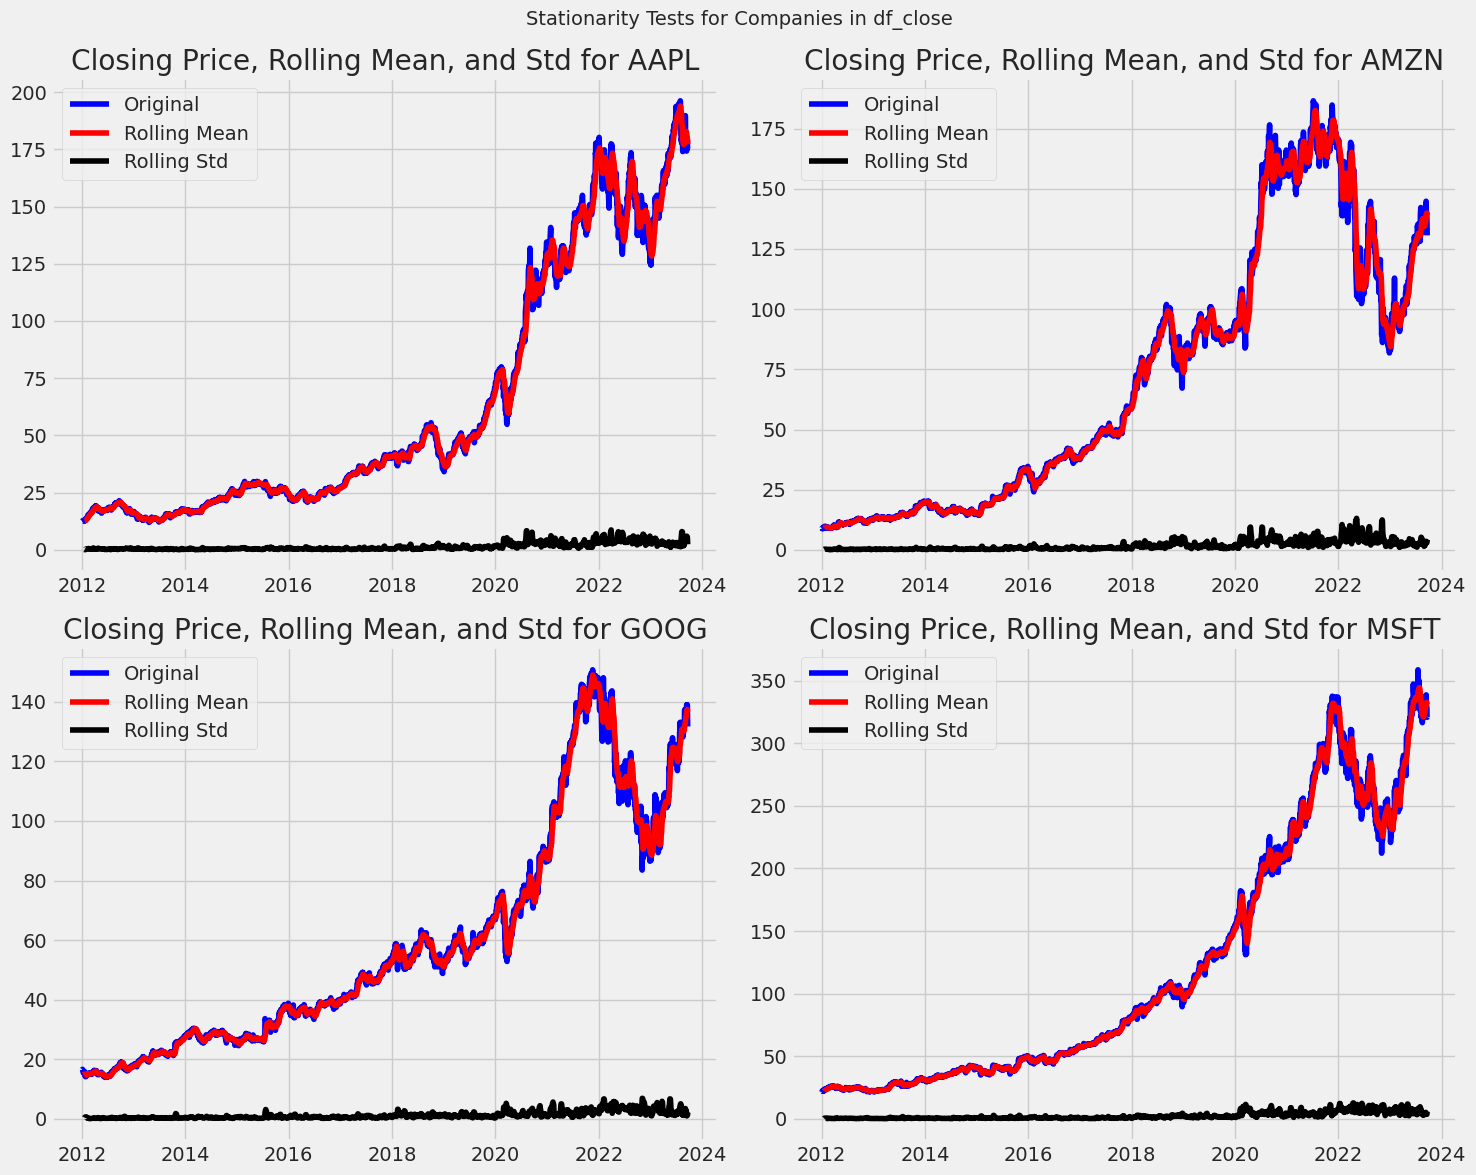

<Figure size 640x480 with 0 Axes>

In [20]:
def test_stationarity(df):

    n_companies = len(df.groupby('Company'))
    rows, cols = (n_companies // 2) + (n_companies % 2 != 0), 2  
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 6))  #
    
    for company_index, (company, group) in enumerate(df.groupby('Company')):
        row, col = divmod(company_index, cols)

        # Calculate rolling mean and standard deviation
        rolmean = group['Close'].rolling(window=12).mean()
        rolstd = group['Close'].rolling(window=12).std()

        # Plot on current subplot
        axes[row, col].plot(group['Close'], color='blue', label='Original')
        axes[row, col].plot(rolmean, color='red', label='Rolling Mean')
        axes[row, col].plot(rolstd, color='black', label='Rolling Std')
        axes[row, col].legend(loc='best')
        axes[row, col].set_title(f"Closing Price, Rolling Mean, and Std for {company}")

        # ADF test
        result = adfuller(group['Close'])
        print(f"ADF test for {company}:")
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

    fig.suptitle('Stationarity Tests for Companies in df_close', fontsize=14)
    plt.tight_layout()
    plt.show()
    save_figs("fig_1e.png")

test_stationarity(df_close)


#### Observations 

1. **Overall Trend:**
All four companies (Apple, Amazon, Google, and Microsoft) have seen their stock prices increase significantly over the years.
The upward trend has been particularly strong in recent years.

2. **Price Fluctuations:**
The stock prices of all companies have gone up and down, but the overall direction is upward.
Some periods have been more volatile (with bigger swings) than others.

3. **Rolling Mean:**
The rolling mean (the smooth blue line) gives a general idea of the overall direction of the stock price.
When the stock price is above the rolling mean, it suggests the price might be increasing.
When the stock price is below the rolling mean, it suggests the price might be decreasing.

4. **Standard Deviation:**
The standard deviation (the red line) shows how much the stock price varies from its average.
A higher standard deviation means the price is fluctuating more.
A lower standard deviation means the price is fluctuating less.

Since the p-value for all four companies (AAPL, AMZN, GOOG, and MSFT) is greater than the critical values at all significance levels (1%, 5%, and 10%), we fail to reject the null hypothesis of non-stationarity.


| Stock | ADF Statistic | p-value | Stationary |
|---|---|---|---|
| AAPL | 0.376641 | 0.980600 | False |
| AMZN | -0.836046 | 0.808304 | False |
| GOOG | 0.185893 | 0.971459 | False |
| MSFT | 0.791777 | 0.991502 | False |


In [21]:
df_close.sample(10)

,Open,High,Low,Close,Volume,Company
Date,,,,,,
2022-03-25 04:00:00+00:00,172.361538,173.749306,171.241401,173.194199,80546200,AAPL
2019-10-30 04:00:00+00:00,138.112086,139.536315,137.409582,139.161011,18496600,MSFT
2013-02-11 05:00:00+00:00,13.160000,13.162500,12.830000,12.860500,68074000,AMZN
2023-01-23 05:00:00+00:00,99.129997,101.400002,98.750000,101.209999,31791800,GOOG
2013-03-11 04:00:00+00:00,13.671500,13.699500,13.520000,13.562000,38098000,AMZN
2022-07-13 04:00:00+00:00,141.949542,145.384357,141.085862,144.431351,71185600,AAPL
2019-02-07 05:00:00+00:00,100.090868,100.471472,99.234495,100.166985,29760700,MSFT
2018-10-12 04:00:00+00:00,55.400002,55.750000,54.320099,55.504002,42026000,GOOG
2016-10-18 04:00:00+00:00,27.391600,27.398553,27.222401,27.227037,98214000,AAPL


#### Decomposition for Finding Components of Time Series

Decomposition is one of the primary methods used to find and analyze the components of a time series. It systematically breaks down the time series into its underlying components, which typically include:

1. **Trend**: The long-term direction of the data (upward, downward, or flat).
2. **Seasonality**: Regular, repeating patterns or cycles in the data at fixed intervals.
3. **Cyclical**: Irregular cycles that don’t follow a fixed period (these are sometimes included in the trend component in simpler models).
4. **Irregularity (Noise/Residuals)**: The random variation in the data that isn’t explained by the trend or seasonality.

#### Types of Decomposition Models

There are two main types of decomposition models:

- **Additive Decomposition**: Assumes the components add together. It’s used when the seasonal variation is roughly constant over time.
  - **Model**: `Data = Trend + Seasonality + Irregularity`

- **Multiplicative Decomposition**: Assumes the components multiply together. It’s used when the seasonal variation increases or decreases with the level of the time series.
  - **Model**: `Data = Trend * Seasonality * Irregularity`

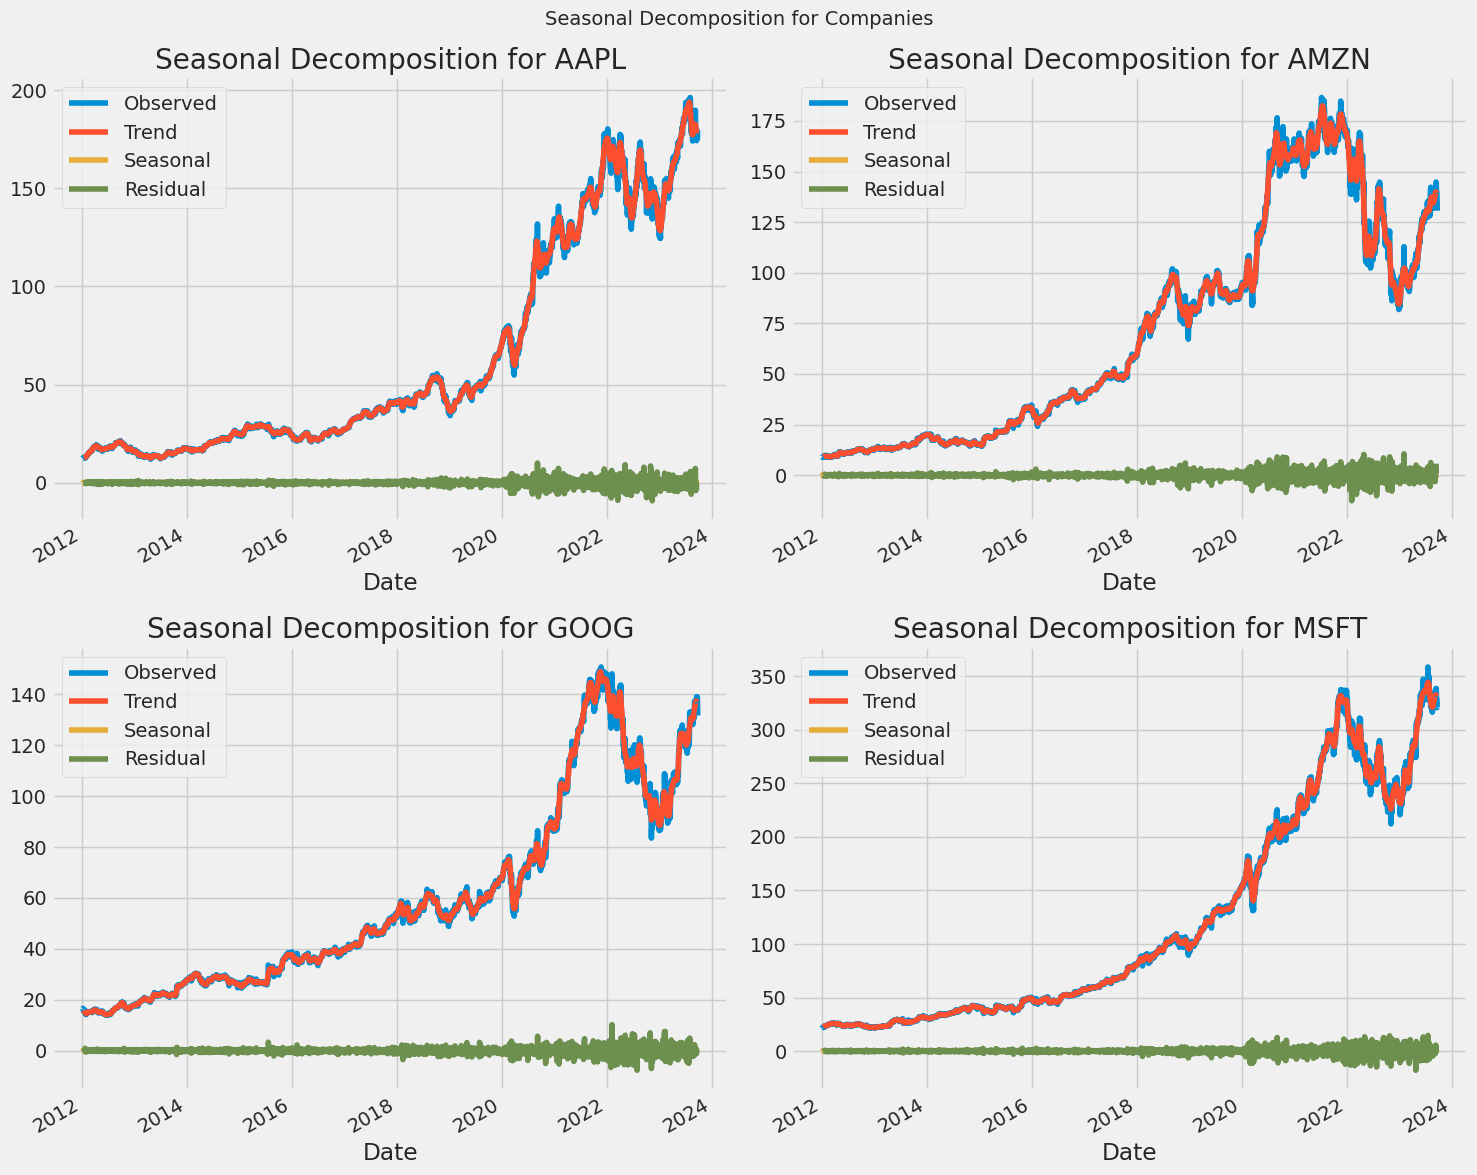

<Figure size 640x480 with 0 Axes>

In [23]:
#To separate the trend and the seasonality from a time series, 
def apply_seasonal_decompose(df):

    n_companies = len(df.groupby('Company'))
    rows, cols = (n_companies // 2) + (n_companies % 2 != 0), 2 
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 6))  

    for company_index, (company, group) in enumerate(df.groupby('Company')):
        row, col = divmod(company_index, cols)

        # Seasonal Decomposition
        decomposition = seasonal_decompose(group['Close'], model='additive', period=12)

        # Plot components
        decomposition.observed.plot(ax=axes[row, col], label='Observed')
        decomposition.trend.plot(ax=axes[row, col], label='Trend')
        decomposition.seasonal.plot(ax=axes[row, col], label='Seasonal')
        decomposition.resid.plot(ax=axes[row, col], label='Residual')
        axes[row, col].set_title(f"Seasonal Decomposition for {company}")
        axes[row, col].legend()

    fig.suptitle('Seasonal Decomposition for Companies', fontsize=14)
    plt.tight_layout()
    plt.show()
    save_figs("fig_1f.png")

    
apply_seasonal_decompose(df_close)


In [24]:
df = df_close[df_close["Company"] == "AAPL"]["Close"]

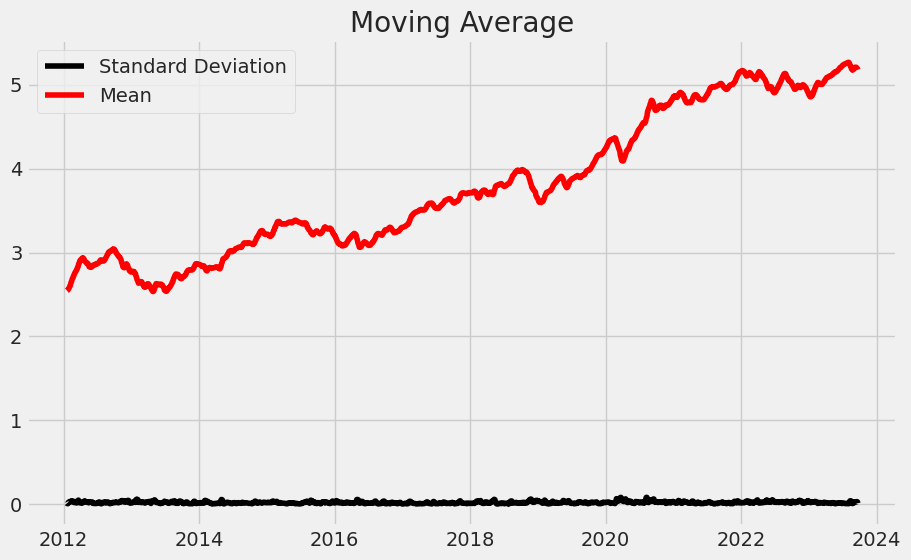

<Figure size 1000x600 with 0 Axes>

In [25]:
#if not stationary then eliminate trend

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()
save_figs("fig_1g.png")


#### Observations 

1. **Overall Trend:**
The log transformation appears to have successfully removed the upward trend present in the original data. The series now fluctuates around a relatively stable mean.

2. **Volatility:**
The standard deviation line (black) oscillates around a relatively constant level, indicating that the volatility of the data has been stabilized. This suggests that the log transformation has effectively reduced the (unequal variance) in the original data.

3. **Mean Reversion:**
The mean line (red) is relatively flat, suggesting a tendency for the data to revert to its mean over time. This is a characteristic of many financial time series.


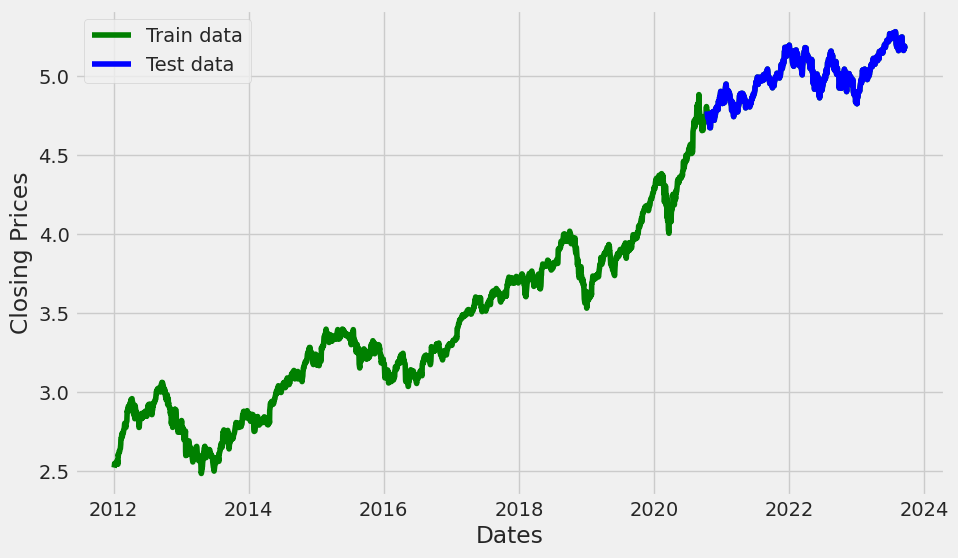

In [26]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.75)], df_log[int(len(df_log)*0.75):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
save_figs("fig_1h.png")


In [30]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import pandas as pd
import numpy as np

# Function to find the best ARIMA model
def best_arima_model(data):
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    best_aic = np.inf
    best_pdq = None
    best_model = None

    for param in pdq:
        try:
            model = ARIMA(data, order=param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_model = results
        except Exception:
            continue

    return best_model, best_pdq

model, params = best_arima_model(train_data)
print(f"Best ARIMA parameters: {params}")


Best ARIMA parameters: (1, 1, 0)


In [31]:
# Build Model
model = ARIMA(train_data, order=(1,1,0))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2208
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5727.923
Date:                Fri, 09 Aug 2024   AIC                         -11451.846
Time:                        15:36:12   BIC                         -11440.447
Sample:                             0   HQIC                        -11447.682
                               - 2208                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0610      0.013     -4.677      0.000      -0.087      -0.035
sigma2         0.0003   4.94e-06     65.985      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-

In [33]:
test_data.shape[0]

738

In [34]:
preds = fitted.get_forecast(test_data.shape[0], alpha=0.05)  # 95% conf

fc = preds.predicted_mean
# Extract standard errors
se = preds.se_mean
# Extract confidence intervals
conf = preds.conf_int()


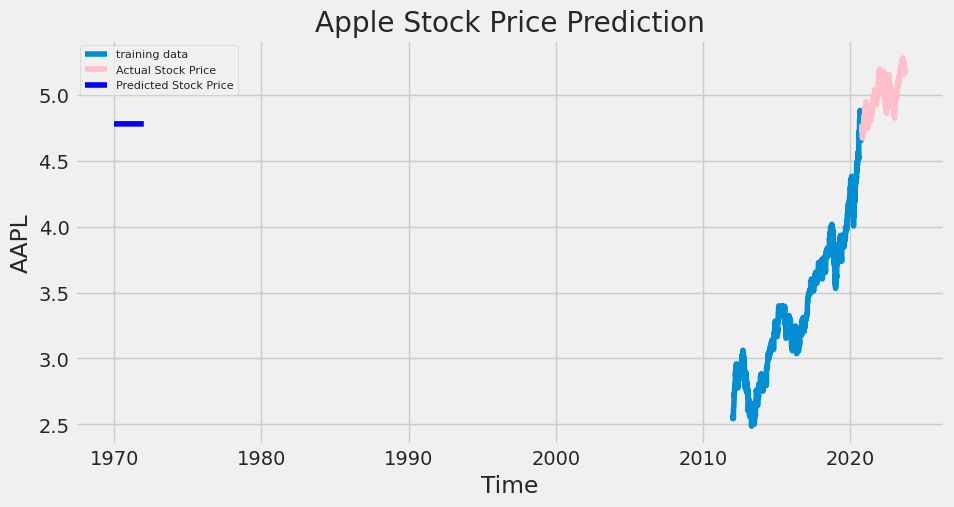

<Figure size 1000x600 with 0 Axes>

In [36]:
fc_series = pd.Series(fc.values, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'pink', label='Actual Stock Price')
plt.plot(fc_series.values, color = 'blue',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL')
plt.legend(loc='upper left', fontsize=8)
plt.show()
save_figs("fig_1i.png")